# Lab_06: Decision trees and Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
!wget https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/2d-synthetic.csv -O synthetic_dataset.csv

--2022-05-01 17:34:58--  https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/2d-synthetic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19259 (19K) [text/plain]
Saving to: ‘synthetic_dataset.csv’

synthetic_dataset.c 100%[===================>]  18,81K  --.-KB/s    in 0,001s  

2022-05-01 17:34:58 (21,8 MB/s) - ‘synthetic_dataset.csv’ saved [19259/19259]



In [2]:
from sklearn.datasets import load_wine
X_wine, y_wine = load_wine(return_X_y=True, as_frame=True)


In [3]:
X_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
y_wine # target

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [7]:
from sklearn.datasets import fetch_openml

X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y=True)


## 2.1 Wine classification

In [8]:
X_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [9]:
print(f'label\tnumber of samples')
for label in y_wine.unique():
    print(f"{label}\t {sum(y_wine.isin([label]))}")


label	number of samples
0	 59
1	 71
2	 48


In [10]:
from sklearn.tree import DecisionTreeClassifier
# they don't want to divide between training and test, mmmmm....
decision_tree = DecisionTreeClassifier().fit(X_wine, y_wine)

[Text(0.5657894736842105, 0.9166666666666666, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(0.34210526315789475, 0.75, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(0.21052631578947367, 0.5833333333333334, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(0.10526315789473684, 0.4166666666666667, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3157894736842105, 0.4166666666666667, 'X[2] <= 2.45\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.2631578947368421, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.3684210526315789, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.47368421052631576, 0.5833333333333334, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(0.421052

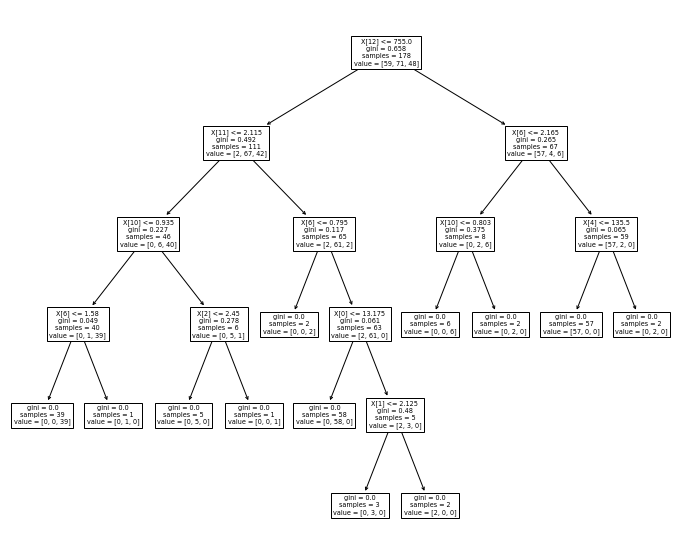

In [11]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12,10))
plot_tree(decision_tree, ax=ax)

In [12]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
preds = decision_tree.predict(X_wine)
score = accuracy_score(y_true=y_wine, y_pred=preds)
score # overfit, obv

1.0

In [13]:
# now divide in training and test
from sklearn.model_selection import train_test_split

np.random.seed(0) # set the seed

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=.2)

In [14]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
161,13.69,3.26,2.54,20.0,107.0,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680.0
92,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0
94,11.62,1.99,2.28,18.0,98.0,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
24,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0
67,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0
117,12.42,1.61,2.19,22.5,108.0,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345.0
47,13.90,1.68,2.12,16.0,101.0,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985.0


In [15]:
y_train

161    2
92     1
94     1
174    2
24     0
      ..
103    1
67     1
117    1
47     0
172    2
Name: target, Length: 142, dtype: int64

In [16]:
decision_tree = DecisionTreeClassifier().fit(X_train, y_train)
preds = decision_tree.predict(X_test)
score_labels = ['precision', 'recall', 'f1', 'support'] 
scores = precision_recall_fscore_support(y_true=y_test, y_pred=preds)
for label,score in zip(score_labels, scores):
    print(str(label).upper())
    print('class0\tclass1\tclass2')
    print(f"{score[0]:.2f}\t{score[1]}\t{score[2]}")
    print("\n")

PRECISION
class0	class1	class2
0.93	1.0	1.0


RECALL
class0	class1	class2
1.00	0.9375	1.0


F1
class0	class1	class2
0.97	0.967741935483871	1.0


SUPPORT
class0	class1	class2
14.00	16	6




In [17]:
# gridsearch
from sklearn.model_selection import ParameterGrid

parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5],
    'splitter': ['best', 'random'], 
    'min_samples_leaf': [1,3,5]
}
clfs_accuracy = []
for configuration in ParameterGrid(parameters):
    clf = DecisionTreeClassifier(**configuration).fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    clfs_accuracy.append((configuration, accuracy))

In [18]:
scores = [i[-1] for i in clfs_accuracy]
indexes = np.argwhere(np.array(scores) == max(scores)).squeeze()
for idx in indexes:
    print(clfs_accuracy[idx])

({'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'splitter': 'best'}, 0.9722222222222222)
({'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'splitter': 'random'}, 0.9722222222222222)
({'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'splitter': 'best'}, 0.9722222222222222)
({'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'splitter': 'random'}, 0.9722222222222222)
({'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'splitter': 'best'}, 0.9722222222222222)
({'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'splitter': 'best'}, 0.9722222222222222)
({'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'splitter': 'best'}, 0.9722222222222222)
({'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'splitter': 'best'}, 0.9722222222222222)


In [35]:
# cross validation
from sklearn.model_selection import KFold

# Split the datasets into two:
# - X_train_valid: the dataset used for the k-fold cross-validation
# - X_test: the dataset used for the final testing (this will NOT
# be seen by the classifier during the training/validation phases)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X_wine, y_wine, test_size=.2)
kf = KFold(5) # 5-fold cross-validation
scores = []
# X and y are the arrays to be split
for train_indices, validation_indices in kf.split(X_train_valid):
    #print(train_indices)
    X_train = X_train_valid.iloc[train_indices]
    X_valid = X_train_valid.iloc[validation_indices]
    y_train = y_train_valid.iloc[train_indices]
    y_valid = y_train_valid.iloc[validation_indices]
    clf = DecisionTreeClassifier(criterion ='gini', max_depth= None, min_samples_leaf= 1, splitter='best').fit(X_train, y_train)
    pred = clf.predict(X_valid)
    score = accuracy_score(y_true=y_valid, y_pred=pred)
    scores.append(score)
    

In [36]:
clfs_accuracy = []
clfs = []
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X_wine, y_wine, test_size=.2)
for configuration in ParameterGrid(parameters):
    kf = KFold(5) # 5-fold cross-validation
    scores = []
    counts = [] # take into account how many training points we have in each fold
    # X and y are the arrays to be split
    for train_indices, validation_indices in kf.split(X_train_valid):
        counts.append(len(train_indices))
        
        X_train = X_train_valid.iloc[train_indices]
        X_valid = X_train_valid.iloc[validation_indices]
        y_train = y_train_valid.iloc[train_indices]
        y_valid = y_train_valid.iloc[validation_indices]
        
        clf = DecisionTreeClassifier(**configuration).fit(X_train, y_train)
        clfs.append(clf)
        pred = clf.predict(X_valid)
        score = accuracy_score(y_true=y_valid, y_pred=pred)
        scores.append(score)
    # clfs_accuracy.append((configuration, np.mean(scores))) wrong mean, we need the average and taking into account the count, hence we weight accuracies
    clfs_accuracy.append((configuration, np.average(scores, weights=counts)))

In [45]:
max(scores)
np.argwhere(np.array(scores) == max(scores))

array([[18]])

In [49]:
scores = [i[1] for i in clfs_accuracy]
indexes = np.argwhere(np.array(scores) == max(scores)).reshape((1,)) # it infers the column size
for idx in indexes:
    print(idx, clfs_accuracy[idx])

18 ({'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'splitter': 'best'}, 0.9220755567890099)


In [50]:
pred = clfs[indexes[0]].predict(X_test)
final_score = accuracy_score(y_test, pred)
final_score

0.8888888888888888

[Text(0.4375, 0.9166666666666666, 'X[6] <= 2.446\ngini = 0.663\nsamples = 114\nvalue = [35, 44, 35]'),
 Text(0.1875, 0.75, 'X[0] <= 12.165\ngini = 0.527\nsamples = 69\nvalue = [2, 32, 35]'),
 Text(0.125, 0.5833333333333334, 'gini = 0.0\nsamples = 15\nvalue = [0, 15, 0]'),
 Text(0.25, 0.5833333333333334, 'X[9] <= 4.043\ngini = 0.479\nsamples = 54\nvalue = [2, 17, 35]'),
 Text(0.125, 0.4166666666666667, 'X[0] <= 12.891\ngini = 0.124\nsamples = 15\nvalue = [0, 14, 1]'),
 Text(0.0625, 0.25, 'gini = 0.0\nsamples = 11\nvalue = [0, 11, 0]'),
 Text(0.1875, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(0.375, 0.4166666666666667, 'X[11] <= 2.911\ngini = 0.231\nsamples = 39\nvalue = [2, 3, 34]'),
 Text(0.3125, 0.25, 'X[2] <= 2.128\ngini = 0.105\nsamples = 36\nvalue = [0, 2, 34]'),
 Text(0.25, 0.08333333333333333, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.375, 0.08333333333333333, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]'),
 Text(0.4375, 0.25, 'gini = 0.444\nsamp

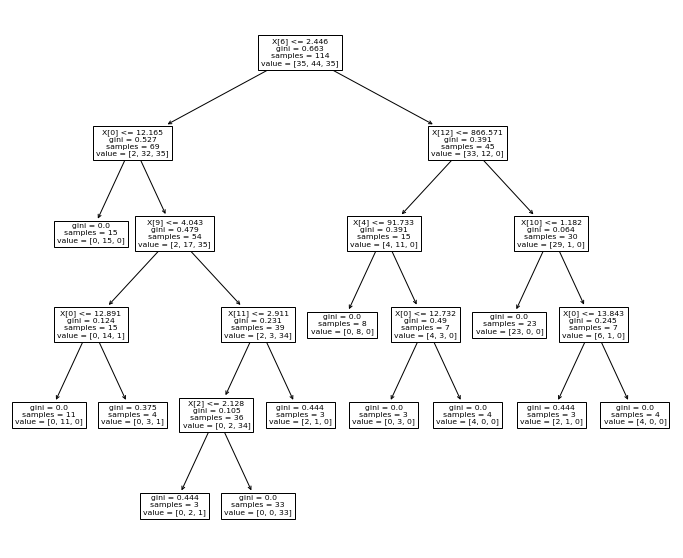

In [51]:
fig, ax = plt.subplots(figsize=(12,10))
plot_tree(clfs[indexes[0]], ax=ax)

In [55]:
#  a list of the features used at each node. A value of -2 indicates a leaf node (where no split occurs)
clfs[indexes[0]].tree_.feature 

array([ 6,  0, -2,  9,  0, -2, -2, 11,  2, -2, -2, -2, 12,  4, -2,  0, -2,
       -2, 10, -2,  0, -2, -2], dtype=int64)

In [54]:
#  a list of cardinalities of the classes for each node.
clfs[indexes[0]].tree_.value

array([[[35., 44., 35.]],

       [[ 2., 32., 35.]],

       [[ 0., 15.,  0.]],

       [[ 2., 17., 35.]],

       [[ 0., 14.,  1.]],

       [[ 0., 11.,  0.]],

       [[ 0.,  3.,  1.]],

       [[ 2.,  3., 34.]],

       [[ 0.,  2., 34.]],

       [[ 0.,  2.,  1.]],

       [[ 0.,  0., 33.]],

       [[ 2.,  1.,  0.]],

       [[33., 12.,  0.]],

       [[ 4., 11.,  0.]],

       [[ 0.,  8.,  0.]],

       [[ 4.,  3.,  0.]],

       [[ 0.,  3.,  0.]],

       [[ 4.,  0.,  0.]],

       [[29.,  1.,  0.]],

       [[23.,  0.,  0.]],

       [[ 6.,  1.,  0.]],

       [[ 2.,  1.,  0.]],

       [[ 4.,  0.,  0.]]])

In [56]:
# a list of impurity decreases for each node. 
clfs[indexes[0]].tree_.impurity

array([0.66251154, 0.52678009, 0.        , 0.47942387, 0.12444444,
       0.        , 0.375     , 0.23142669, 0.10493827, 0.44444444,
       0.        , 0.44444444, 0.39111111, 0.39111111, 0.        ,
       0.48979592, 0.        , 0.        , 0.06444444, 0.        ,
       0.24489796, 0.44444444, 0.        ])

In [29]:
clfs[indexes[0]].feature_importances_ #12 features

array([0.        , 0.        , 0.        , 0.06425378, 0.03338996,
       0.11321064, 0.        , 0.00225454, 0.00856153, 0.        ,
       0.02830655, 0.34068561, 0.4093374 ])